<a href="https://colab.research.google.com/github/MouhamedB-Ndiaye/Hand-written-digits-recognition/blob/main/Digits_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# load the data and split the data to training set and test set

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
# scale down the value of the image pixels from 0-255 to 0-1

train_images = train_images / 255.0

test_images = test_images /255.0

(60000, 28, 28)
(10000, 28, 28)
(60000,)


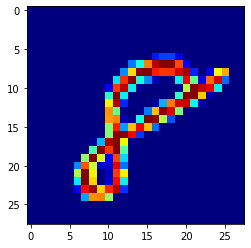

In [17]:
# visualize the data

print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)

plt.imshow(train_images[59999], cmap= 'jet')
plt.show()

In [20]:
# define the model

my_model = tf.keras.models.Sequential()
my_model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
my_model.add(tf.keras.layers.Dense(128, activation='relu'))
my_model.add(tf.keras.layers.Dense(10, activation='softmax'))
#softmax function turns its inputs into a probabilistic range we can interpret

In [21]:
# compile the model

my_model.compile(optimizer='adam',
                 loss= 'sparse_categorical_crossentropy',
                 metrics=['accuracy'])

In [26]:
# train the model

my_model.fit(train_images, train_labels, epochs=7)
#As we train the model for more epochs, the accuracy of our model will increase until a certain point. 

Epoch 1/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1812 - accuracy: 0.9484
Epoch 2/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1749 - accuracy: 0.9500
Epoch 3/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1690 - accuracy: 0.9521
Epoch 4/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1635 - accuracy: 0.9535
Epoch 5/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1578 - accuracy: 0.9547
Epoch 6/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1529 - accuracy: 0.9567
Epoch 7/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1480 - accuracy: 0.9584


In [28]:
# checking the model for accuracy on the test data

val_loss, val_acc = my_model.evaluate(test_images, test_labels)
print("Test accuracy: ", val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1544 - accuracy: 0.9563
Test accuracy:  0.9563000202178955


In [29]:
# saving our model for later use

my_model.save('my_mnist_model')

INFO:tensorflow:Assets written to: my_mnist_model/assets


In [30]:
# Let’s retrieve the model from the file system to make sure that it works

my_new_model = tf.keras.models.load_model('my_mnist_model')

In [31]:
#Let’s also test our new model with the test data 
#to make sure that we are getting the same exact accuracy with the new model as well.

new_val_loss, new_val_acc = my_new_model.evaluate(test_images, test_labels)

print("New Test accuracy:", new_val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1544 - accuracy: 0.9563
New Test accuracy: 0.9563000202178955


In [ ]:
# Conclusion: We have just built, trained, evaluated, saved, retrieved and re-evaluated our ML model. 